# Building and exporting the lattice

The package used for building the lattice, and the plotting, pybinding, can be found on the website:
http://docs.pybinding.site/en/stable/ 
with the installation guide and many building examples provided. Until the new version 0.9 is released, you should install the package directly from the git repository via:
pip3 install git+https://github.com/dean0x7d/pybinding.git
instead of using: 
pip3 install pybinding

In [ ]:
# Include files

In [1]:
import matplotlib.pyplot as plt
import define_lattice as dl
import export_lattice as ex

In [2]:
# define lattice of monolayer graphene by setting the number of nearest neighbors and onsite energies at atoms.
# - onsite energies can be a number, array, or matrix, where for the last case off-diagonal terms represent orbital
# hoppings at the same lattice site.
# - label for the onsite potential are chosen from a set of
#   rectangular and
#   gaussian disorder distribution.
# if not presented the field won't appear in exported file.
# - magnetic field can be set to True. Default case is False. In exported file it's converted to 1 and 0.
lattice = dl.monolayer_graphene(nearest_neighbors=3, onsite=([[1, 1], [1, 2]], [[1, 1], [1, 2]]),
                                onsite_labels='rectangular', magnetic_field=True)

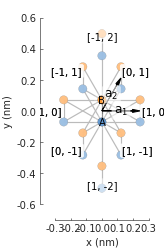

In [3]:
# plotting the lattice
lattice.plot()
plt.show()

In [4]:
# number of decomposition parts in each direction of matrix.
nx = ny = 1
# number of unit cells in each direction.
lx = ly = 1
# make config object which caries info about
# - the number of decomposition parts [nx, ny],
# - lengths of structure [lx, ly]
# - boundary conditions, setting True as periodic boundary conditions, and False elsewise,
# - info if the exported hopping and onsite data should be complex,
# - info of the precision of the exported hopping and onsite data, 0 - float, 1 - double, and 2 - long double.
config = ex.Config(divisions=[nx, ny], length=[lx, ly], boundaries=[True, True], is_complex=False, precision=1)

In [5]:
# make calculation object which caries info about
# - the name of the function
#   DOS - denstity of states,
#   CondXX - conductivity in xx direction
#   CondXY - conductivity in xy direction
#   OptCond - optical conductivity
#   SpinCond - spin conductivity
# - number of moments for the calculation,
# - number of different random vector realisations,
# - number of disorder realisations.
calculation = ex.Calculation(fname='DOS', num_moments=1024, num_random=50, num_disorder=1)

In [6]:
# export the lattice from the lattice object, config and calculation object and the name of the file
ex.export_lattice(lattice, config, calculation, "test.h5")